# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Reading Dataset

In [2]:
data = pd.read_csv('/home/syam/Desktop/sarath/AI  projects/diamond/diamond_data/diamonds.csv')
print(data.shape)
data.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

# Data Preprocessing

### Remove 'Unnamed:0' column

In [5]:
data = data.drop(["Unnamed: 0"],axis=1)

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# convert price value to float
data["price"]= data.price.astype(float)   

### Remove features x, y, z containing Zero values

In [8]:
data.loc[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)]
data = data[(data[['x', 'y', 'z']] !=0).all(axis=1)]

In [9]:
print(data.shape)
data.head()

(53920, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


# Feature Engineering

In [10]:
# Add size value to dataframe
data["size"] = data["x"]* data["y"]* data["z"]
data = data.drop(data[['x', 'y', 'z']], axis=1)
data_1 =data.copy()

# Label Encoder convert categorical data into numerical data

In [11]:
columns = (data.dtypes =="object")
object_col = list(columns[columns].index)
def label_encoding(d):
    """
    Input  : Input dataframe 
    _________________________________
    Output : Encoded dataframe
    __________________________________
    Descriptiion : convert categorical features to numerical value
    """
    label_encoder = LabelEncoder()
    for col in object_col:
        d[col] = label_encoder.fit_transform(d[col])
    return d

data=label_encoding(data)

# Visualizing distribution of each features

/home/syam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/syam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/syam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


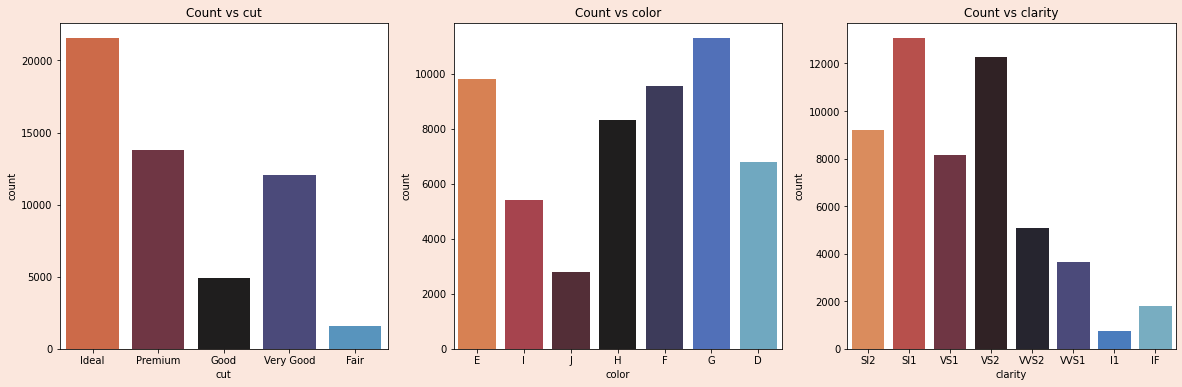

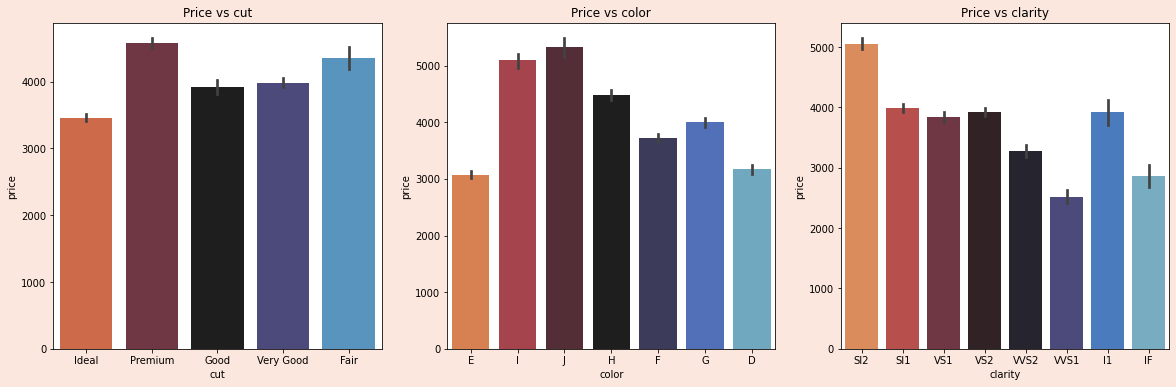

In [12]:
def visualise(object_col,data):
    """
    Inputs :
    object_col: feature names
    data  : encoded dataframe
    _____________________________________________________
    Description :plot relation between price,count of diamond vs features of the diamonds(cut,color,clarity)
    _____________________________________________________
    """
    fig_1 = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')
    for i in range(len(object_col)):
        fig_1.add_subplot(1, 3, i+1)
        sns.countplot(data_1[object_col[i]], palette='icefire_r')
        plt.title("Count vs %s"%object_col[i])
    plt.show() 

    fig_2 = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')
    for i in range(len(object_col)):
        fig_2.add_subplot(1, 3, i+1)
        sns.barplot(x=object_col[i], y="price", data=data_1, palette='icefire_r')
        plt.title("Price vs %s"%object_col[i])
    plt.show()

plot=visualise(object_col,data_1)

# Corelation matrix

<AxesSubplot:>

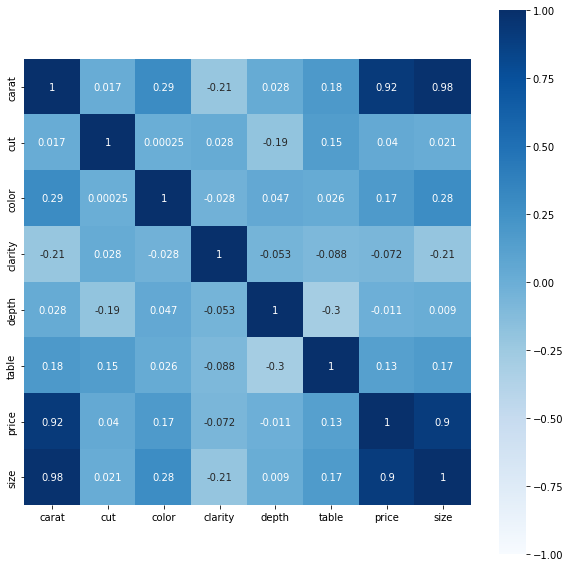

In [13]:
# corelation between different features of diamond
corr=data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,vmin=-1, vmax=1, center=0,square=True, annot = True,cmap="Blues")

# Split dataset into Target and Feature

In [14]:
Y =data["price"]
X = data.drop("price",axis=1)

# Scale the data using MinMaxScaler

In [15]:
scaler =MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into Train_set and Test_set

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.01,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(53380, 7)
(540, 7)
(53380,)
(540,)


# Building the Model

In [17]:
# Use cross-validation method to evaluate the best model for predicting the value
Model = {"Linear_Regression": LinearRegression(),
         "Decision_Tree_Regressor": DecisionTreeRegressor(),
         "K_neighbors_Regression": KNeighborsRegressor(),
         "Random_Forest_Regression": RandomForestRegressor()
        }
for name,model in Model.items():
    print(f'Using model: {name}')
    print("score",cross_val_score(model,X_train,Y_train,cv=5).mean())  
    print("="*40)

Using model: Linear_Regression
score 0.8758644509524744
Using model: Decision_Tree_Regressor
score 0.9667099776900947
Using model: K_neighbors_Regression
score 0.9632733550870677
Using model: Random_Forest_Regression
score 0.9808295674520823


# Predicting the model

In [18]:
model_1 = RandomForestRegressor()
model_1.fit(X_train,Y_train)
Y_pred = model_1.predict(X_test)

In [19]:
for X,Y in list(zip(X_test, Y_test))[:10]:
    print(f"model predicts {model_1.predict([X])[0]}, real value: {Y}")

model predicts 1103.336, real value: 874.0
model predicts 8080.385, real value: 9273.0
model predicts 11695.550833333335, real value: 11743.0
model predicts 1056.5625000000002, real value: 1064.0
model predicts 754.2433333333335, real value: 906.0
model predicts 4161.13, real value: 3528.0
model predicts 3042.1465000000003, real value: 2638.0
model predicts 976.7706666666667, real value: 894.0
model predicts 2149.78, real value: 2247.0
model predicts 5097.16, real value: 4548.0


## Regression Score

In [20]:
score = r2_score(Y_test,Y_pred)*100
print("Regression Score:",score)
print(f"Root_mean_square_error: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")

Regression Score: 98.21760110252661
Root_mean_square_error: 548.2784342693477


# Visualize the prediction

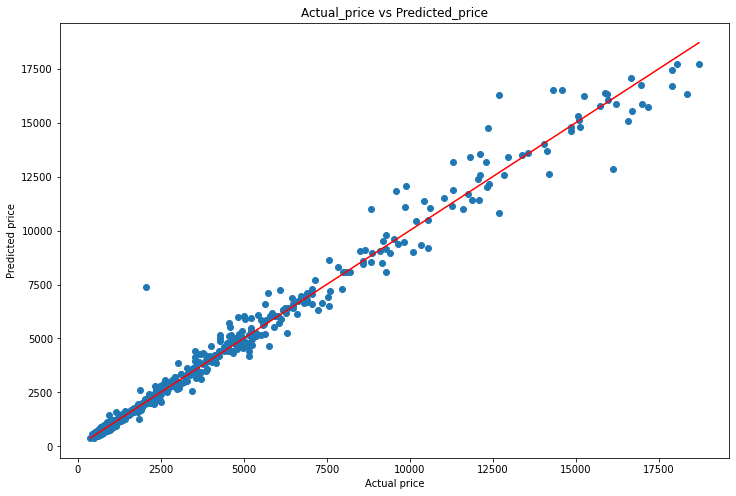

In [21]:
fig= plt.subplots(figsize=(12,8))
p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.scatter(Y_test,Y_pred)
plt.plot([p1, p2], [p1, p2], "red")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual_price vs Predicted_price")
plt.show()